# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('base_scikitlearn.csv') # Carregando base de dados preparada para o scikitlearn (apenas variáveis numéricas ou booleanas) )
print(df.isna().sum()) # Sem missings
df.dtypes # Sem variáveis str

Unnamed: 0                                0
sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated                    0
estado_civil_Single / not married         0
estado_civil_Widow                        0
tipo_residencia_House / apartment         0
tipo_residencia_Municipal apartm

Unnamed: 0                                  int64
sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64
educacao_Secondary / secondary special      int64
estado_civil_Married                        int64
estado_civil_Separated                      int64
estado_civil_Single / not married           int64


In [3]:
# Separando a variável de interesse das variáveis explicativas
y = df.mau # Data Frame com a variável de interesse bool
X = df.drop('mau',axis=1) # Data Frame com as variáveis explicativas
# Separando as bases de treino e teste 70% para treino e 30% para o teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [4]:
clf = DecisionTreeClassifier(random_state=101) # Construindo a árvore de decisão
clf = clf.fit(X_train,y_train) # Treinando o modelo com os dados de treino

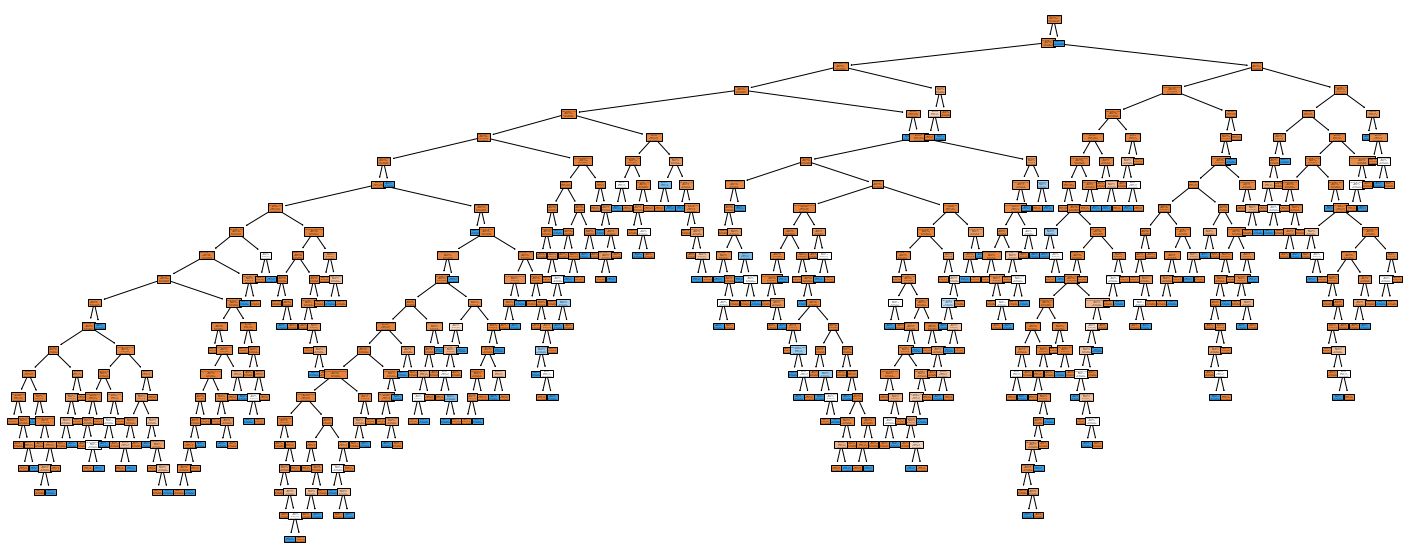

In [5]:
# Plotando a árvore de decisão
plt.figure(figsize=(25, 10))
plot_tree(clf, # Árvore de decisão
          filled=True, # Pintando os nós para indicar a classe majoritária para classificação
          class_names=['Aprovados', 'Reprovados'], # Nome das classes
          feature_names=X.columns); # Nome das condições

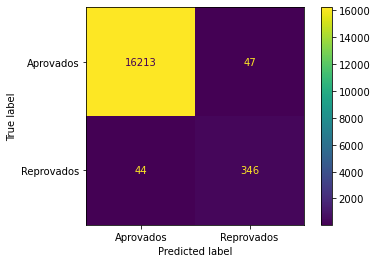

In [6]:
plot_confusion_matrix(clf, X, y, display_labels=['Aprovados', 'Reprovados']) # Analisando a matriz de confusão do treino

In [7]:
predict = clf.predict(X) # calculando a acurácia da base de treinos
acc_treino = accuracy_score(y, predict)
acc_treino

0.9945345345345346

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

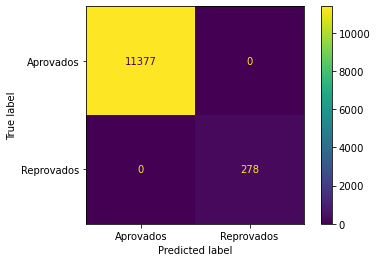

In [8]:
y_chapeu_teste = clf.predict(X_test) #classificando a base de teste 
plot_confusion_matrix(clf, X_train,y_train, display_labels=['Aprovados', 'Reprovados']); # Matriz de confusão do teste

In [9]:
acc_test = accuracy_score(y_test, y_chapeu_teste) # Calculando a accuracia de teste
print(acc_treino)
acc_test #Comparando as acurácias de treino e teste nota-se que são bem elevadas e bem próximas

0.9945345345345346


0.9817817817817818

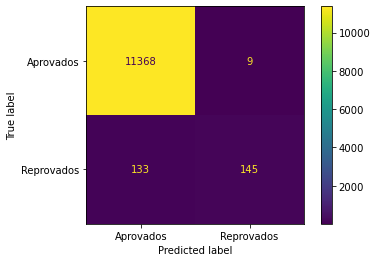

In [12]:
clf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123) # Classificando uma nova árvore de decisão commáximo de profundidade=10, amostras por folha =5.
clf2 = clf2.fit(X_train,y_train) # Classificando a base de treino
plot_confusion_matrix(clf2, X_train,y_train, display_labels=['Aprovados', 'Reprovados']) #Plotando a matriz de confusão de treino


In [13]:
predict2 = clf2.predict(X) #Acurácia do treino
acc_treino2 = accuracy_score(y, predict2)
acc_treino2

0.987027027027027

0.9851851851851852

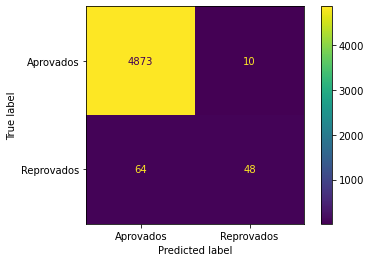

In [14]:
y_chapeu_teste = clf2.predict(X_test) #Acurácia de Teste
plot_confusion_matrix(clf2, X_test,y_test, display_labels=['Aprovados', 'Reprovados'])
acc_test2 = accuracy_score(y_test, y_chapeu_teste)
acc_test2

In [15]:
48/4873 #proporção de proponentes calssificados com 'mau' após a poda da árvore



0.009850194951775087

In [31]:
# Descobrindo a acurácia caso todos os casos da variável 'mau' fossem False
y2 = df['mau'].replace(True,False) #Criando um novo y com todos resultados como False
acc_test3 = accuracy_score(y2_test, y2_chapeu_teste) #Testando a acurácia caso todos os casos da variável 'mau' fossem False  
acc_test3

1.0